In [179]:
df = pd.read_csv('data/churn.csv')
import model as fxns
clean = fxns.Cleaning()
clean.fit(df)
df = clean.all(scale=True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 16 columns):
avg_dist                  49406 non-null float64
avg_rating_by_driver      49406 non-null float64
avg_rating_of_driver      49406 non-null float64
avg_surge                 49406 non-null float64
surge_pct                 49406 non-null float64
trips_in_first_30_days    49406 non-null float64
weekday_pct               49406 non-null float64
last_trip_datetime        49406 non-null datetime64[ns]
signup_date_datetime      49406 non-null datetime64[ns]
churn                     49406 non-null int64
length_of_use             49406 non-null float64
early_churn               49406 non-null int64
luxury_car_user           49406 non-null int64
city_King's Landing       49406 non-null uint8
city_Winterfell           49406 non-null uint8
phone_iPhone              49406 non-null uint8
dtypes: datetime64[ns](2), float64(8), int64(3), uint8(3)
memory usage: 5.4 MB


## Created Length of use column, length of time from signup to churn

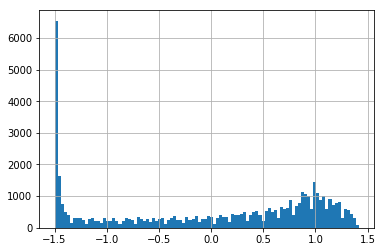

In [183]:
df['length_of_use'].hist(bins=100)

Notice a high volume of users quit before day 3 or day 14. Created a mask 'did user churn early' or 'did user not churn early'

In [189]:
eda = fxns.EDA()
eda.fit(df)

In [185]:
cat_chart = eda.cat_charter()

continuous_cols = []
categorical_cols = []
for col in cat_chart.index:
    if cat_chart.loc[col,'Unique_Values'] < 10:
        categorical_cols.append(col)
    else:
        continuous_cols.append(col)
        
cat_chart

,Unique_Values,Non_null_count
avg_dist,2899.0,49406.0
avg_rating_by_driver,27.0,49406.0
avg_rating_of_driver,37.0,49406.0
avg_surge,115.0,49406.0
surge_pct,367.0,49406.0
trips_in_first_30_days,59.0,49406.0
weekday_pct,664.0,49406.0
last_trip_datetime,182.0,49406.0
signup_date_datetime,31.0,49406.0
churn,2.0,49406.0


## Look at Categorical Variables

In [186]:
continuous_cols

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'trips_in_first_30_days',
 'weekday_pct',
 'last_trip_datetime',
 'signup_date_datetime',
 'length_of_use']

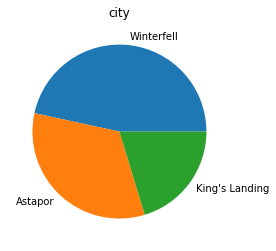

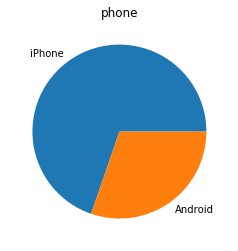

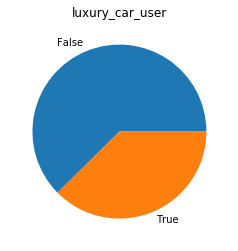

In [45]:
for column in categorical_cols:
    eda.pie_plot(column)

## Scatter Matrix of Continuous variable

In [9]:
scatter_df = df[continuous_cols]

In [10]:
scatter_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,49406.000000,49406.000000,49406.000000,49406.000000,49406.000000,49406.000000,49406.000000
mean,5.783987,4.777861,4.665897,1.074617,8.846788,2.284176,60.913282
std,5.627329,0.447114,0.582976,0.221009,19.890166,3.799164,37.023166
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,5.000000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.700000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [11]:
scatter_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,last_trip_datetime,signup_date_datetime
0,3.67,5.0,4.7,1.10,15.4,4,46.2,2014-06-17,2014-01-25
1,8.26,5.0,5.0,1.00,0.0,0,50.0,2014-05-05,2014-01-29
2,0.77,5.0,4.3,1.00,0.0,3,100.0,2014-01-07,2014-01-06
3,2.36,4.9,4.6,1.14,20.0,9,80.0,2014-06-29,2014-01-10
4,3.13,4.9,4.4,1.19,11.8,14,82.4,2014-03-15,2014-01-27


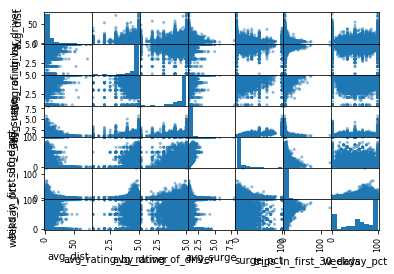

In [12]:
scat_mat = scatter_matrix(scatter_df)


Text(0.5, 0, 'avg_dist')

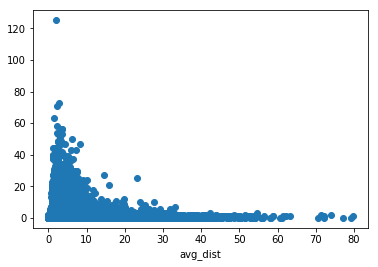

In [13]:


plt.scatter(df['avg_dist'],df['trips_in_first_30_days'])
plt.xlabel('avg_dist')

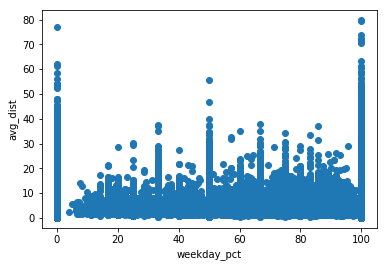

In [15]:
eda = fxns.EDA()
eda.fit(df)

eda.scatplot('weekday_pct', 'avg_dist')

## Create Model

In [38]:
df = pd.read_csv('data/churn.csv')
import model as fxns
clean = fxns.Cleaning()
clean.fit(df)
df = clean.all(scale=True)
df = clean.drop_dt()
df = df.drop(['length_of_use', 'early_churn'], axis=1) 

In [201]:
y = df.churn.values
X = df.drop('churn', axis=1).values

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [204]:
rf = GradientBoostingClassifier()
gb = RandomForestClassifier()

In [236]:
rf.fit(X_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [210]:
rf.score(X_test, y_test)

0.9586116170815624

In [212]:
mod = fxns.Model()

In [213]:
mod.fit(df)

In [218]:
np.mean(mod.CV(rf.fit(X_train, y_train)))

0.13899835786622228

In [215]:
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

/Users/kylecaron/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9529447480267152

In [217]:
np.mean(mod.CV(gb.fit(X_train, y_train)))

0.1472119127770525

In [222]:
y_hat = gb.predict(X_test)
np.mean(y_hat==y_test)

0.9536531066585712

In [225]:
##Evaluating Model Performance
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_hat))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_hat))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_hat))

Accuracy: 0.9536531066585712
Precision: 0.9725731382978723
Recall: 0.9523111979166666


Learned that our model suffers from Data Leakage. Created two features called 'length of use' and 'early_churn', which were interrelated with our labels.

## Test Model without Data Leakage

In [237]:
df = pd.read_csv('data/churn.csv')
import model as fxns
clean = fxns.Cleaning()
clean.fit(df)
df = clean.all(scale=True)
df = clean.drop_dt()
df = df.drop(['length_of_use', 'early_churn'], axis=1) 

In [238]:
y = df.churn.values
X = df.drop('churn', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
rf_og = GradientBoostingClassifier()
gb_og = RandomForestClassifier()

In [239]:
rf_og.fit(X_train, y_train)
mod = fxns.Model()
mod.fit(df)
np.mean(mod.CV(rf_og.fit(X_train, y_train)))

0.3211472425848817

In [240]:
rf_og.score(X_test, y_test)

0.7820279295689132

In [241]:
##Evaluating Model Performance
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_hat))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_hat))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_hat))

Accuracy: 0.5357215138635903
Precision: 0.6304853723404256
Recall: 0.6159467359532316


## Feature importance

In [243]:
import requests
import itertools
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from mpl_toolkits.mplot3d import Axes3D





In [247]:
names = df.drop('churn',axis=1).columns

In [258]:
mod = fxns.Model()
mod.fit(df)
mod.feature_imp(rf.fit(X_train, y_train))

AttributeError: 'Model' object has no attribute 'feature_imp'

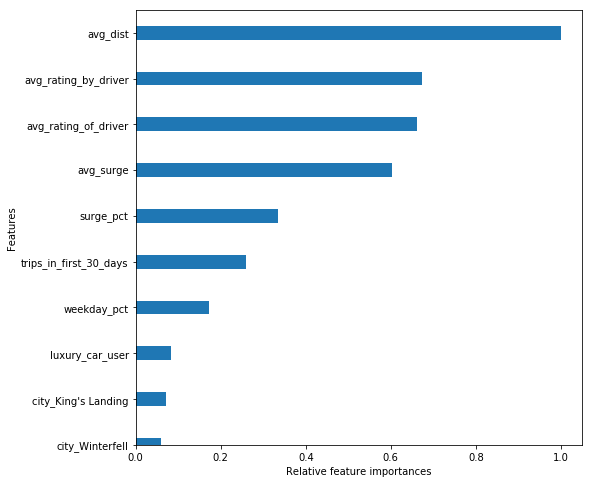

In [248]:
feature_importances = rf_og.feature_importances_
top10_colindex = np.argsort(feature_importances)[::-1][0:10]
feature_importances = feature_importances[top10_colindex]
feature_importances = feature_importances / float(feature_importances.max())

y_ind = np.arange(9, -1, -1) # 9 to 0
fig = plt.figure(figsize=(8, 8))
plt.barh(y_ind, feature_importances, height = 0.3, align='center')
plt.ylim(y_ind.min() + 0.5, y_ind.max() + 0.5)
plt.yticks(y_ind, names)
plt.xlabel('Relative feature importances')
plt.ylabel('Features');